In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Linear Regression Models


## Notes from W2 Class:
Exploratory Data Analysis:

-Summary Statistics

-Correlation Matrix

-Visualise, graphical representation to see the actual distribution not just the summary statistics

Cleaning Data:
-Address Outliers: tend to be from measurement of data, not actually representative of population

-Address Anomalies: genuine data point that falls outside the general space of the dataset

-Change Detection: Seasonality or catalyst based

-Missing values/Incorrectly inputted values (i.e US vs U.S)

Only analyze the part of the data you want to

Keep in mind we have our ML model that we want to create, the optimizer which determines parameters, and a regularizer which restricts the values the parameter can take on. Regularizer can be Lasso, Ridge, or elastic net.

Example of parametric model: We determine the number of parameters and what type.

Non-Parametric Model: Data decides the number of parameters/what type

Two very different ways to teain a linear regression model
1. Using a closed-form equationt hat directly computes the model parameters that best fit the model to the training set. (i.e, the model parameters that minimize the cost function over the training set)
2. Using an iterative optimization approach called gradient descent (GD) that gradually tweaks the model parameters to minimize the cost function over the teaining set, eventually converging to the same set of parameters as the first method.

Stochastisticy (randomness) of SGD as opposed to Gradient descent allows you to get out of local minimums or plateaus better than regular gradient descent.

Hyperparameters we need to decide on for our minimising loss functions(Optimizers):


1. Learning Rate

2. Batch Size

3. Momentum (if the mass/speed of the ball is high then it won't get stuck in local minimum as it goes down the error graph)

4. Gridsearch (how many different points shoudl I attempt to see if I get a better minimum) Example of fine tuning

In the context of machine learning, often better to find a quick solution and iterate than waste so much time finding initial solution.

Training-validation-test recap:

Training set used to change parameters of our model. But at some point we start fitting our noise.

If we have a validation set, we can see where the performance (error) diverges between the training and validation sets. When validation set error increases, we can bring the model back (stopping condition). Read up more about this later.

How do we train a Lin-Reg model?
In chapter 2 we saw that the most common performance measure of a regression model is the root mean square error. Therefore, to train a linear regression model, we need to find the paramter vector value (theta) that minimizes the RMSE. In practice it is simpler for us to minimize the mean squared error (MSE) than the RMSE, and it leads to the same result as the value that minimizes a positive function also minimizes it's square root.


# Textbook Content Continues from Here

### The Normal Equation

To find the value of theta that minimizes the MSE, there exists a closed-form soltion - in other words, a mathematical equation that gives the result directly. This is called the Normal equation

In [3]:
import numpy as np
np.random.seed(42) #Makes this code reproducible by setting a seed
m = 100 #number of instances
X = 2 * np.random.rand(m, 1) #column vector
y = 4 + 3 * X + np.random.randn(m, 1) #column vector

#This code creates the linear regression function using random integers

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'X')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Linear Regression Data')

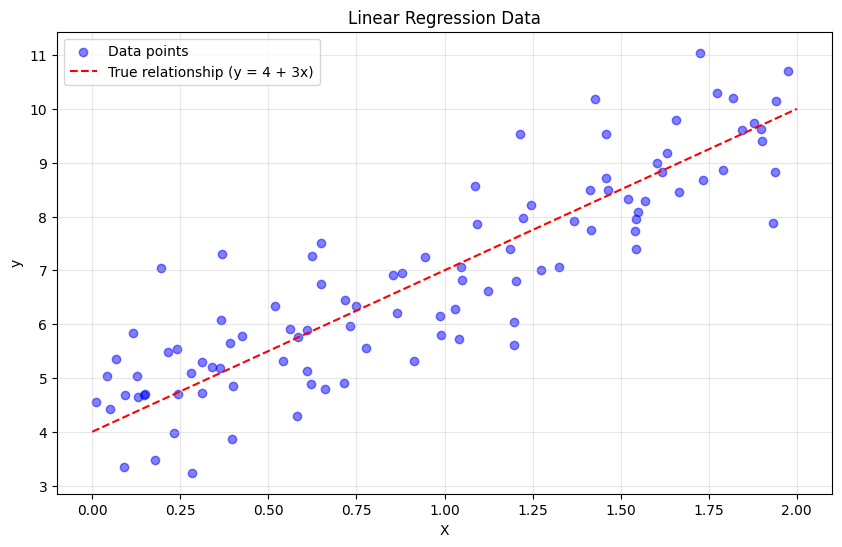

In [4]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Data')
plt.grid(True, alpha=0.3)
plt.legend()

# Optional: plot the true relationship (y = 4 + 3x)
X_plot = np.array([[0], [2]])  # Create endpoints for the line
y_plot = 4 + 3 * X_plot  # True relationship without noise
plt.plot(X_plot, y_plot, color='red', linestyle='--', label='True relationship (y = 4 + 3x)')
plt.legend()

plt.show()
#This code plots the linear regression function using the matplotlib library

In [5]:
#Now that we have the randomly generated linear dataset, we can use the inv() function from NumPy's linear algebra module
#np.linalg to compute the inverse of a matrix, and the dot() method for matrix multiplication

from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @X_b.T @ y

#The @ operator performs the matrix multiplicaiton. If A and B are NumPy arrays, then A @ B is equivalent to np.mattmul(A,B.)
#You cannot use the @ operator on pure python arrays

theta_best
#The first value is the theta 0 value (y intercept) which we know the true value to be 4, the second value is
# the theta 1 value (x1 coefficient) which we know to be 3. The model noise made it impossible to recover the exact
#parameters of the original function.

array([[4.21509616],
       [2.77011339]])

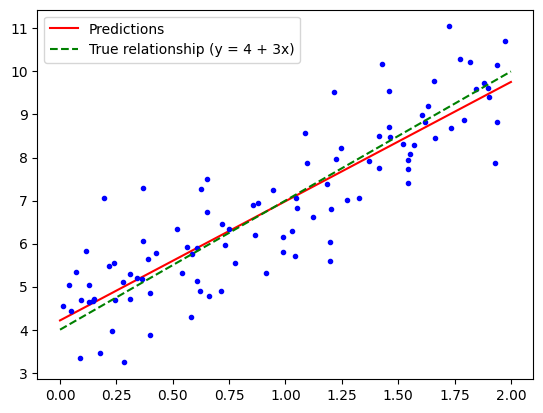

In [6]:
#We are creating the prediction line taking two points x = 0 and x = 2
#Using the trained model to predict their y-values
#Drawing a line through these predictions
#The blue dots show our original training data, and the red line shows what the model
#thinks the relationship should be

# 1. Create two points to draw the prediction line
X_new = np.array([[0],[2]])  # Just two X values: 0 and 2

# 2. Add the bias term (x0 = 1) to each point
X_new_b = add_dummy_feature(X_new)  # Adds a column of 1s

# 3. Make predictions using your trained model
y_predict = X_new_b @ theta_best  # Matrix multiplication to get predictions

# 4. Plot everything
plt.plot(X_new, y_predict, "r-", label="Predictions")  # Red line showing model predictions
plt.plot(X, y, "b.")  # Blue dots showing original data


# Optional: plot the true relationship (y = 4 + 3x)
X_plot = np.array([[0], [2]])  # Create endpoints for the line
y_plot = 4 + 3 * X_plot  # True relationship without noise
plt.plot(X_plot, y_plot, color='green', linestyle='--', label='True relationship (y = 4 + 3x)')
plt.legend()
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

LinearRegression()

(array([4.21509616]), array([[2.77011339]]))

array([[4.21509616],
       [9.75532293]])

### Summary
1. Implementation

Firstly, we implemented the normal equation manually to complete a linear regression
Secondly, we use scikit-learn's optimized implementation to do the same thing

2. Readability

Manual method is more mathematical, shows us what's happening 'under the hood'
New method is more abstracted, easier to use but hides the mathematical details

# Gradient Descent

Gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of probles. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function.

Gradient descent measures the local gradient of the error function with regard to the parameter vector theta, and it goes in the direction of descending gradient. Once the gradient is zero, you ahve reached a minimum.

In practice, you start by filling theta with random valeus (called random initialization). Then you continue by improving it gradually, taking one step at a time in the direction which decreases the cost function (e.g the MSE), until the algorithm converges to a minimum.

An important parameter in gradient descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.

However, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorith diverge with larger and larger values, failing to find a good value of theta which minimises the cost function.

REFER TO PAGE 140 and 141 OF THE TEXTBOOK FOR VISUAL EXAMPLES

In [8]:
eta = 0.1 #Learning rate - how big steps we take
n_epochs = 1000 #Number of training iterations
m = len(X_b) # number of instances (training examples)

np.random.seed(42)
theta = np.random.randn(2,1) #start with randomly initialized model parameters

# Training loop
for epoch in range(n_epochs):
    #calclate the gradient
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    #update parameters
    theta = theta - eta * gradients

theta
#This is different from the previous normal equation method which solved it directly 
# in one step. Gradient descent finds the answer iteratively, like walking downhill 
# until you reach the bottom.



array([[4.21509616],
       [2.77011339]])

## Stochastic Gradient Descent

The main problem with batch gardient descent is that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, SGD picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

Pros:

Algorithm is faster

Can be trained on huge datasets as only one instanc eneeds to be in memory at each iteration

Cons:

Due to its stochastic nature, this algorithm is much less regular than batch gradient descent: instead of gently decreasing until it reaches the minum, the cost function will bounce up and down, decreasing only on average. 

Final parameter values will be good, but not optimal

In [9]:
#SGD Example
n_epochs = 50

t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T @(xi @ theta - yi) #for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

theta

#CONTINUE FROM PAGE 147

array([[4.21076011],
       [2.74856079]])

In [13]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([-0.75275929,  0.56664654])

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

LinearRegression()

(array([1.78134581]), array([[0.93366893, 0.56456263]]))